In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [121]:
# 1 Step:- Read the the datasets 
# 2 Step:- Data Preparation --> EDA / FE -- clean data etc
# 3 Step:- Divide the data into X and Y
# 4 Step:- Train Test Split
# 5 Step:- Scaling
# 6 Step:- Model Training 
# 7 Step:- Model Evaluation 

In [122]:
# 1 Step:- Read the the datasets 
df=pd.read_csv("/Users/abhineshsingh/Music/EDA DATA/height-weight.csv")

In [123]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


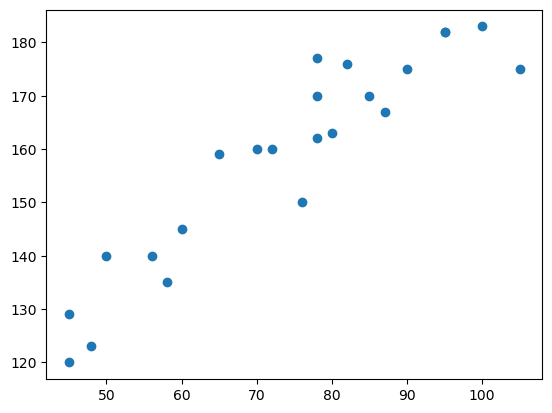

In [124]:
plt.scatter(df.Weight,df.Height)

In [125]:
# Divide the data into X and Y

In [126]:
x=df[["Weight"]]
y=df[["Height"]]

In [127]:
x

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [128]:
y

,Height
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182
9,170


In [129]:
# Train Test Split

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
x_train , x_test , y_train , y_test = train_test_split(x,y ,test_size=0.3,random_state=1)
x_train

,Weight
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45
15,78
22,72


In [132]:
# scaling 

In [133]:
from sklearn.preprocessing import StandardScaler


In [134]:
scaler=StandardScaler()

In [135]:
scaler

StandardScaler()

In [136]:
x_train

,Weight
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45
15,78
22,72


In [137]:
# train data ---fit transform
X_train=scaler.fit_transform(x_train)
X_test=scaler.transform(x_test)


In [138]:
X_train

array([[-0.33596868],
       [-1.6647437 ],
       [ 0.0264245 ],
       [ 0.26801996],
       [ 0.8720086 ],
       [-1.06075505],
       [ 0.57001428],
       [-1.84594029],
       [ 0.14722223],
       [-0.21517095],
       [-1.18155278],
       [ 0.14722223],
       [ 1.17400292],
       [ 1.77799157],
       [ 1.17400292],
       [ 0.14722223]])

In [139]:
X_test

array([[-1.84594029],
       [-0.637963  ],
       [-0.93995732],
       [ 1.47599724],
       [ 0.69081201],
       [-1.54394597],
       [ 0.38881769]])

In [140]:
# model training 

In [141]:
from sklearn.linear_model import LinearRegression

In [142]:
reg=LinearRegression()

In [143]:
reg

LinearRegression()

In [144]:
reg.fit(x_train,y_train)

LinearRegression()

In [145]:
print("The coef is ",reg.coef_)
print("The intercept is",reg.intercept_)

The coef is  [[1.08528678]]
The intercept is [76.99301746]


In [146]:
# y_pred = intercept + coef(x)
# 78 + x_train *1

In [153]:
reg.predict(x_train)

array([[152.96309227],
       [129.08678304],
       [159.47481297],
       [163.8159601 ],
       [174.66882793],
       [139.93965087],
       [169.24239401],
       [125.83092269],
       [161.64538653],
       [155.13366584],
       [137.76907731],
       [161.64538653],
       [180.09526185],
       [190.94812968],
       [180.09526185],
       [161.64538653]])

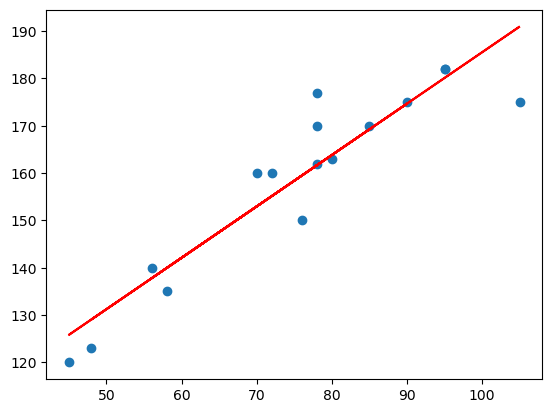

In [156]:
plt.scatter(x_train,y_train)
plt.plot(x_train,reg.predict(x_train),color='red')

In [158]:
y_pred_test=reg.predict(x_test)

In [159]:
y_pred_test

array([[125.83092269],
       [147.53665835],
       [142.11022444],
       [185.52169576],
       [171.41296758],
       [131.25735661],
       [165.98653367]])

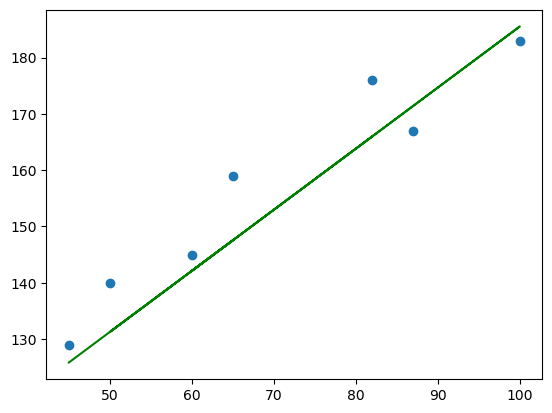

In [162]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred_test,color='green')

In [163]:
# Evaluation matrix 

In [164]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [165]:
MSE=mean_squared_error(y_test,y_pred_test)

In [166]:
MSE

50.33408704814383

In [167]:
MAE =mean_absolute_error(y_test,y_pred_test)

In [168]:
MAE

6.173281083006775

In [169]:
# RMSE

In [170]:
np.sqrt(MSE) # RMSE

7.094652003315161

In [172]:
R_Sqr=r2_score(y_test,y_pred_test)

In [173]:
R_Sqr #85% of y is explained by X, rquare 0 to 1

0.850577349729853

In [174]:
#adj rsquare = 1-(1-rsq)*N-1/n-p-1

In [175]:
score = r2_score(y_test, y_pred_test)

In [176]:
score

0.850577349729853

In [177]:
X_test.shape[1]

1

In [182]:
adj_r_sqr= 1- (1-score)*(len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)

In [183]:
adj_r_sqr

0.8206928196758236